# LAB 2 – SECTION A, BATCH 1, Date: 15th Nov 2021, Bollywood Dataset


In [1]:

import pandas as pd
import matplotlib as mp
import seaborn as sb
import matplotlib.pyplot as plt

bol = pd.read_csv("bollywood.csv")

In [2]:
bol                              # Viewing the dataframe

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


# Q1. How many records are present in the dataset?

In [3]:
# The total number of rows in data set: 

bol.shape[0]

149

# Q2. How many movies got released in each genre? Sort number of releases in each genre in descending order.

In [4]:
# Movies released in each genre:

bol['Genre_Strip'] = bol.Genre.str.strip()          # Creating a new column where the two 'Thriller' and 'Action' are merged
print('The number Movies in each Genre is : ')
bol['Genre_Strip'].value_counts()

              # OR 

# bol.Genre.str.strip().value_counts()

The number Movies in each Genre is : 


Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre_Strip, dtype: int64

In [5]:
# Sorting number of releases in each genre in descending order:

(bol.Genre.str.strip().value_counts()).sort_values(ascending = False) 

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

# Q3. Which genre had highest number of releases?


In [6]:
# Frequently released genre:

bol['Genre_Strip'].mode()

                 # OR

#Genre_sort = bol.Genre.value_counts().sort_values(ascending = False) 
#Genre_sort.head(1)

0    Comedy
dtype: object

# Q4. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

In [7]:
# Cross tabulation of Genre and ReleaseTime:

pd.crosstab(bol['ReleaseTime'], bol['Genre_Strip'])

Genre_Strip,Action,Comedy,Drama,Romance,Thriller
ReleaseTime,,,,,
FS,3,3,4,3,4
HS,3,5,6,3,1
LW,3,5,1,4,2
N,15,23,24,15,22


# Q5. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)

In [8]:
# Extracting the Month column from ReleaseDate column by stripping every combination of '1234567890-' in all the instances of ReleaseDate column: 

bol['Month'] = bol['Release Date'].str.strip('1234567890-')
bol

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Genre_Strip,Month
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Romance,Apr
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Thriller,Jan
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Comedy,Jul
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Drama,Jan
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Comedy,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,Comedy,Feb
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,Thriller,Mar
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,Comedy,Mar
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,Comedy,Mar


In [9]:
# Month with most frequent releases:

bol['Month'].mode()                         # Read about how to effectively use: 'pd.to_datetime()'

        #   OR

#bol['Month'] = pd.DatetimeIndex(bol['Release Date']).month
#bol
#bol['Month'].mode()

0    Jan
dtype: object

# Q6. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?


In [10]:
# The Month in which the high budget bollywood movies are most frequently released:

bol[bol['Budget'] >= 25]['Month'].mode()

0    Feb
dtype: object

# Q7. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as [(BoxOfficeCollection – Budget) / Budget.]

In [11]:
# creating a new column 'ROI' in the dataframe:

roi = (bol['BoxOfficeCollection'] - bol ['Budget'] )/ bol['Budget']
bol['ROI'] = roi
bol

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Genre_Strip,Month,ROI
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Romance,Apr,1.888889
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Thriller,Jan,0.200000
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Comedy,Jul,-0.600000
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Drama,Jan,-0.950000
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Comedy,Jul,-0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,Comedy,Feb,1.000000
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,Thriller,Mar,1.469231
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,Comedy,Mar,-0.625000
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,Comedy,Mar,1.378000


In [12]:
# Top 10 movies with maximum ROI:

Max_ROI = bol.sort_values('ROI',ascending = False).head(10)
Max_ROI['MovieName']

64                    Aashiqui 2
89                            PK
132                  Grand Masti
135                 The Lunchbox
87                        Fukrey
58                      Mary Kom
128                       Shahid
37     Humpty Sharma Ki Dulhania
101           Bhaag Milkha Bhaag
115              Chennai Express
Name: MovieName, dtype: object

# Q8. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [13]:
# Average ROI for different release times:

bol.groupby('ReleaseTime')['ROI'].mean()        # On an Average the movies released in LW have highest ROI

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

# Q9. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

In [14]:
# correlation of 'BoxOfficeCollection' Vs 'YoutubeLikes' in bol dataframe:

bol['BoxOfficeCollection'].corr(bol['YoutubeLikes']) 

#  There is positive degree of Correlation

0.6825165877731297

# Q10. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

In [15]:
# The Genre of movie that sees more YouTube likes:

bol[bol['YoutubeLikes']==bol['YoutubeLikes'].max()]['Genre']

43    Action
Name: Genre, dtype: object

<AxesSubplot:title={'center':'YoutubeLikes'}, xlabel='Genre'>

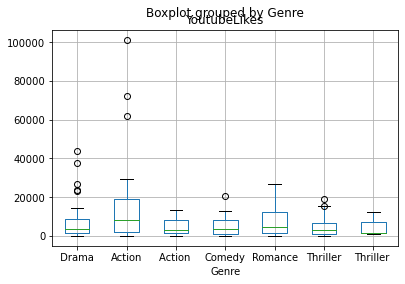

In [16]:
# Boxplots for each genre of movies (for comparing):

bol.boxplot(column='YoutubeLikes', by ='Genre')

                  #     OR 

#sb.catplot(x = "Genre", y= "YoutubeLikes", data = bol, kind = "box") 

# Q11. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? (Note: Draw pair plot or heatmap.)

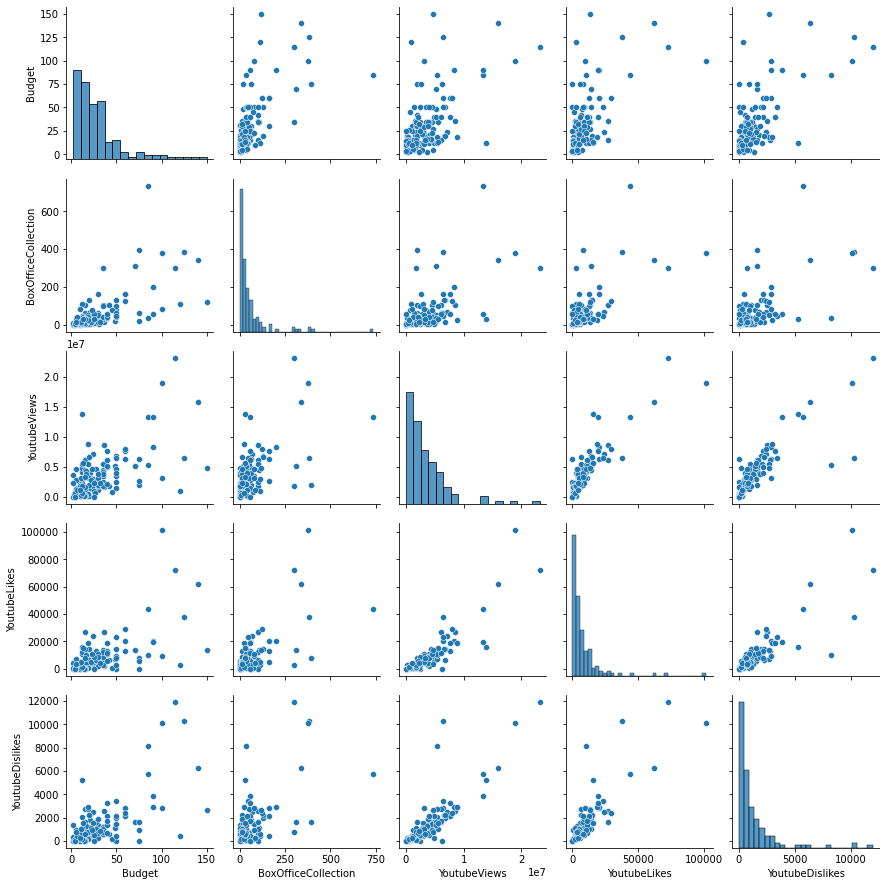

In [17]:
# Finding the attributes which have high degree of Correlation among them:

sb.pairplot(bol, vars = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes'])   # Pairplot

              #   OR

#bol_Attri = bol.loc[:,['BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']]
#Corr_Matrix = bol_Attri.corr()
#sb.heatmap(Corr_Matrix,annot=True)                  # Heatmap

              #   OR

#bol.corr().unstack().sort_values(ascending = False).head(10)

# Q12. During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph.


<AxesSubplot:xlabel='year', ylabel='BoxOfficeCollection'>

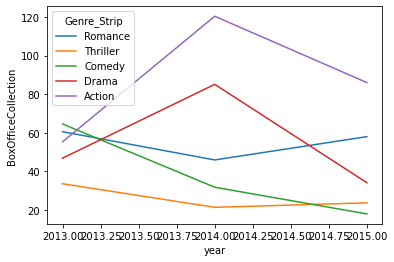

In [25]:


bol['Year'] = pd.DatetimeIndex(bol['Release Date']).year
sb.lineplot(x = 'Year', y = 'BoxOfficeCollection', hue = 'Genre_Strip', data = bol, ci = None)

# Q13. Visualize the Budget and Box office collection based on Genre.


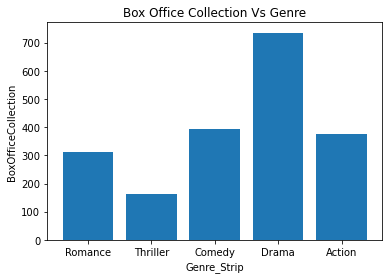

In [31]:
# Visualizing the Budget Vs Genre:

plt.bar(bol.Genre_Strip,bol.BoxOfficeCollection)                # Try using stacked barplot for this Q13
plt.xlabel("Genre_Strip")
plt.ylabel("BoxOfficeCollection")
plt.title("Box Office Collection Vs Genre") 
plt.show() 

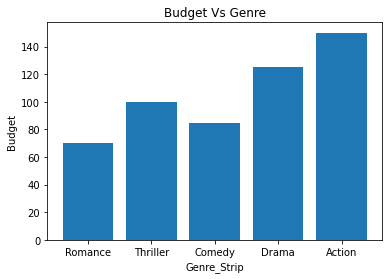

In [30]:
# Visualizing the BoxOfficeCollection Vs Genre:

plt.bar(bol.Genre_Strip,bol.Budget)
plt.xlabel("Genre_Strip")
plt.ylabel("Budget")
plt.title("Budget Vs Genre") 
plt.show() 

# Q14. Find the distribution of movie budget for every Genre.


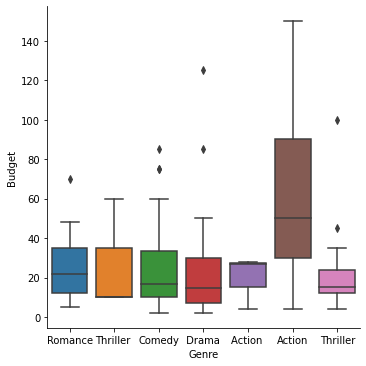

In [22]:


sb.catplot(x = "Genre", y= "Budget", data = bol, kind = "box")

# Q15. During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph.


Text(0.5, 1.0, 'Distribution of number of movies Over Years')

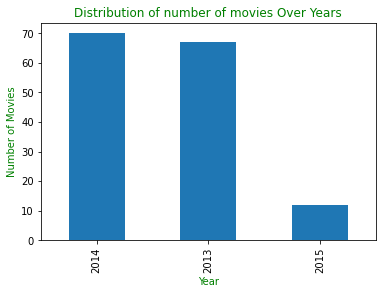

In [37]:
bol['Year'] = pd.DatetimeIndex(bol['Release Date']).year
bol['Year'].value_counts().plot(kind='bar')
plt.xlabel("Year",color ='g')
plt.ylabel("Number of Movies",color ='g')
plt.title("Distribution of number of movies Over Years",color ='g')

Romance


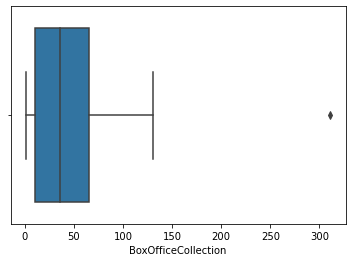

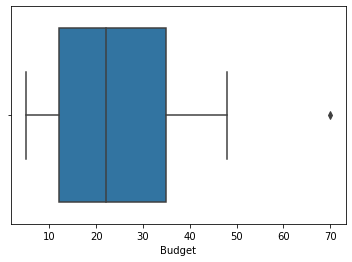

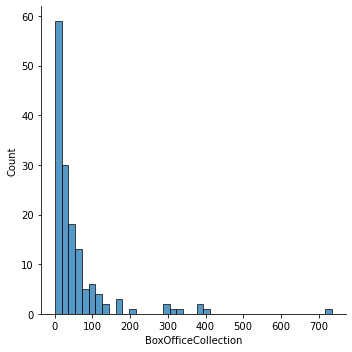

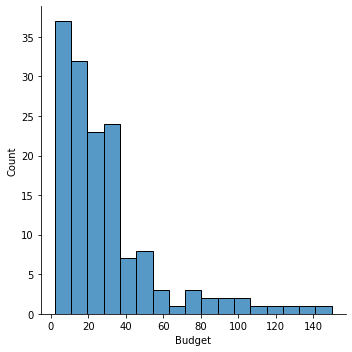

Thriller


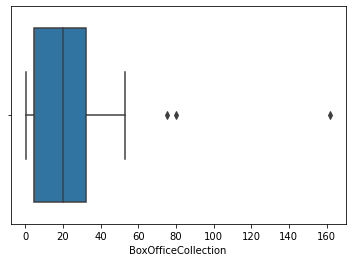

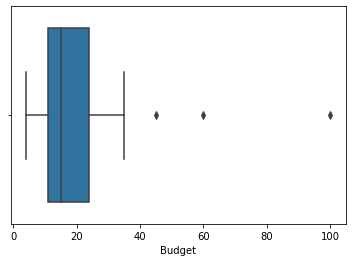

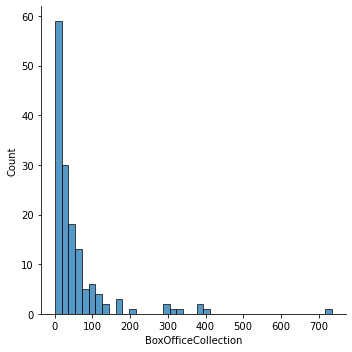

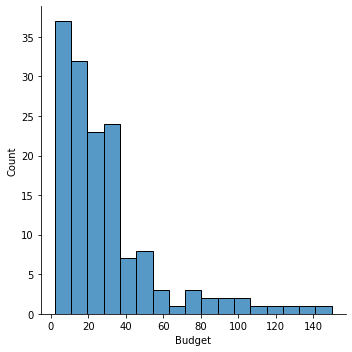

Comedy


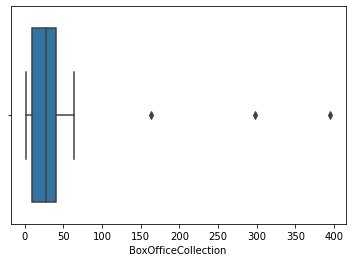

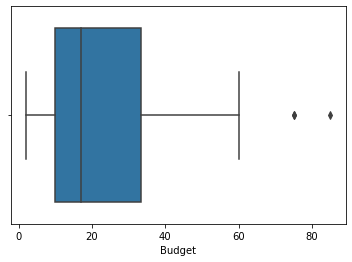

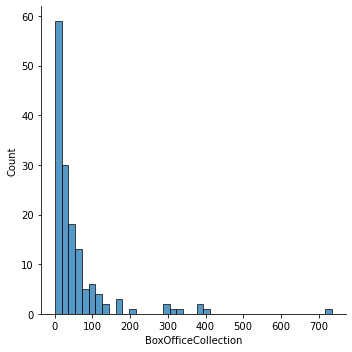

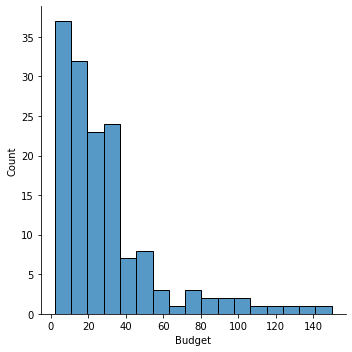

Drama


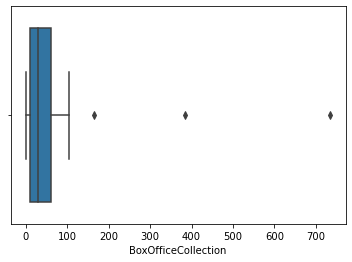

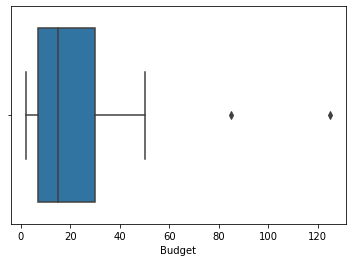

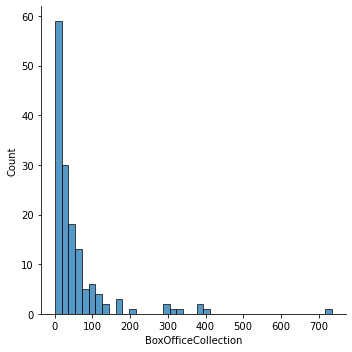

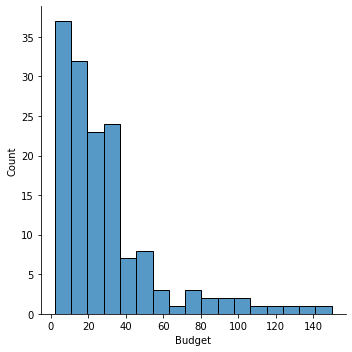

Action


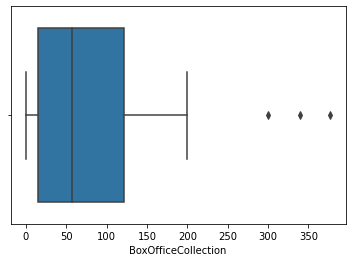

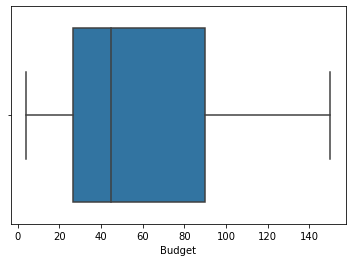

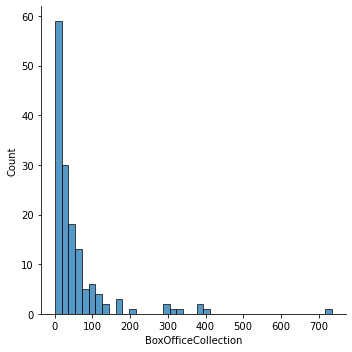

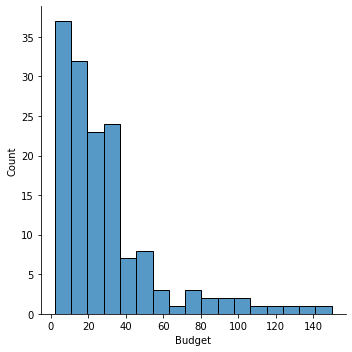

In [55]:
# Trying Q13 in a different way: 

for x in bol['Genre_Strip'].unique(): 
    df_counter = bol[bol['Genre_Strip']==x]
    print(x) 
    sb.boxplot(x=df_counter["BoxOfficeCollection"]) 
    plt.show()
    sb.boxplot(x=df_counter["Budget"]) 
    plt.show()
    #print(df_counter['BoxOfficeCollection'].describe())
    sb.displot(bol, x="BoxOfficeCollection")
    plt.show()
    sb.displot(bol, x="Budget")
    plt.show()

In [59]:
# Trying stacked bar graph for Q.13:

Genre_Collec = bol.groupby('Genre')['BoxOfficeCollection'].sum()
plt.bar(Genre,BoxOfficeCollection)


NameError: name 'Genre' is not defined